<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/Bayesian_Optimization_Model_for_Traffic_Source_and_Engagement_Rate_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : Bayesian Optimization Model for Traffic Source and Engagement Rate Enhancement

**Purpose :**

* The purpose of this project is to **optimize key website metrics**, such as **traffic sources (Organic Search, Direct, Referral) and user engagement metrics (Engaged Sessions, Engagement Rate),** using **Bayesian Optimization.** The ultimate goal is to **maximize user engagement** and improve the overall performance of the website. By utilizing **Bayesian Optimization**, this project helps identify the best combination of **traffic sources and engagement-related variables to drive better business outcomes**, such as higher conversions or increased user retention.

In simple terms, the project aims to use data and optimization techniques to answer questions like:

* How should a website owner distribute focus between **different traffic sources** (Organic, Direct, Referral) to maximize engagement?

* **What page-level features** (like engagement time or actions per session) are most important to increase user activity on the site?

# What is Bayesian Optimization?

*  **Bayesian Optimization** is a method used to find the best solution for complex problems where **testing all possibilities** would be **time-consuming or expensive.** It works by **predicting how different solutions will perform and only testing the most promising ones**. Think of it like an **experienced guesser who learns from past tries and gets better with each attempt.** It’s particularly helpful when you're dealing with functions that are costly to evaluate, such as machine learning models or SEO strategies.

# How Does It Work?

*  **Starts with a guess:** First, it makes an educated guess about where to find the best solution.

*  **Learns from feedback:** It then tries a solution, looks at the result, and adjusts its guesses based on how well it worked.

*  **Improves guesses over time:** With each step, it uses what it has learned to guess better, eventually honing in on the best solution much more efficiently than randomly trying everything.

# How is It Useful for SEO (Search Engine Optimization)?

In SEO, many factors affect your **website’s ranking—like keyword optimization, content, load speed,** etc. Testing all combinations manually would take forever. **Bayesian Optimization helps by automatically suggesting changes (like which keywords or content structure to tweak)** that are most likely to improve your ranking based on past results. It learns which strategies work best as it goes.



# Real-life Implementation Example:

* **SEO Model Tuning:** Let’s say you have a website and want to improve its ranking. Bayesian Optimization can help adjust factors like keyword placement, content structure, and backlinks to give the best possible ranking boost based on data from previous tests.

*  **Hyperparameter Tuning in Machine Learning:** When building AI models, you need to tweak many settings (called hyperparameters) for the model to perform well. Bayesian Optimization helps to quickly find the best settings without testing every possible combination, saving time and computational resources.

*  **A/B Testing:** You could use it in marketing to optimize ad strategies, testing different ad placements, headlines, or images to see which combination gets the most clicks or conversions.



# What Data Do We Need for SEO Tuning?

For **Bayesian Optimization** to improve SEO strategy, it requires key performance indicators (KPIs) about your website. Here’s a breakdown of the kind of data you’ll need in CSV format:

*  **Website Traffic:** This includes the number of visitors, sessions, and page views. Traffic data helps the model understand which pages get more views and which strategies are working.

*  **Keywords:** The keywords you are currently ranking for, and their performance (clicks, impressions, position in search results).

*  **Page Load Time:** Slow page speeds negatively affect SEO. The data should include how fast different pages load.

*  **User Engagement Metrics:** Bounce rates, average session duration, and pages per session. These metrics indicate how users interact with your content.

*  **Rankings:** Historical rankings for your web pages based on different keywords, and how they have changed over time.



In [ ]:
# Step 1: Load the Dataset
# We're loading the dataset from the given file path.
# This dataset contains traffic source data and key metrics like sessions and engagement rate.
data_path = '/content/drive/MyDrive/Dataset For Bayesian Model/data-export (1).csv'
df = pd.read_csv(data_path)  # Read the CSV file into a DataFrame for easy manipulation

# Step 2: Explore the Dataset
# It's a good idea to check the first few rows of the dataset to understand its structure.
# This helps ensure that we have loaded the data correctly and understand what columns are available.
print(df.head())  # Display the first 5 rows of the dataset to get a sense of its contents

  Session primary channel group (Default Channel Group)  Sessions  \
0                                     Organic Social            5   
1                                     Organic Search          218   
2                                      Organic Video            7   
3                                             Direct            0   
4                                           Referral            0   

   Engaged sessions  Engagement rate  Average engagement time per session  \
0                 3         0.600000                           124.000000   
1                99         0.454128                            37.509174   
2                 2         0.285714                            30.000000   
3                 0         0.000000                             0.000000   
4                 0         0.000000                             0.000000   

   Events per session  Event count  Key events  Session key event rate  \
0           20.400000          102           0  

In [ ]:
# Step 3: Define the Objective Function
# The objective function is what the Bayesian optimizer tries to maximize (or minimize).
# Here, we want to maximize the "Engagement Rate" based on different traffic sources.
# The optimizer will test different combinations of traffic sources to find the best engagement rate.
def objective_function(params):
    """
    Objective function for Bayesian Optimization.
    This function calculates the engagement rate based on input traffic sources (e.g., Organic, Direct, Referral).
    The goal is to maximize the engagement rate by adjusting traffic sources.

    Args:
    params: A list of traffic source values in the form [Organic_Search, Direct, Referral].

    Returns:
    - Negative engagement rate (we minimize, so negative turns it into maximization).
    """
    # Unpacking the traffic source values (e.g., Organic Search, Direct, Referral)
    Organic_Search, Direct, Referral = params

    # We create a simplified engagement rate formula based on the traffic source values.
    # In reality, this can be a complex formula, but here we just simulate it for demonstration.
    engagement_rate = Organic_Search * 0.5 + Direct * 0.3 + Referral * 0.2

    # Return the negative of the engagement rate because gp_minimize minimizes by default.
    # To maximize engagement rate, we return it as a negative value.
    return -engagement_rate



# Step-by-Step Breakdown of the Objective Function:

      def objective_function(params):

* **What this does:** This line defines a function called **objective_function**. A function in Python is like a recipe—it performs a set of instructions every time it’s called.

* **Why we need this:** This function is the **"heart"** of the optimization process because it tells the Bayesian optimizer what we’re trying to achieve. In this case, we want to **maximize the engagement rate** based on how much traffic comes from **Organic Search, Direct, and Referral sources**.

*  **Example:** Imagine you have a website, and you want to figure out how to divide your traffic between **search engines (Organic Search), people who directly type your URL (Direct),** and **visitors coming from other websites (Referral)** in order to **maximize the engagement rate.**

              # Unpacking the traffic source values (e.g., Organic Search, Direct, Referral)
              Organic_Search, Direct, Referral = params

**What this does:** This line of code takes the list of traffic source values and separates them into three separate variables: Organic_Search, Direct, and Referral.

**Why we need this:** The optimizer will give a list of numbers like **[0.4, 0.3, 0.3]**, representing the proportion of traffic from Organic Search, Direct, and Referral. Unpacking makes it easier to use these values individually.

**Example:** Suppose the optimizer tries a combination like **[0.6, 0.2, 0.2].** This means **60% of your traffic is from Organic Search, 20% is from Direct traffic, and 20% is from Referral traffic.** This line of code separates those values so we can use them later in the formula.


            # We create a simplified engagement rate formula based on the traffic source values.
            # In reality, this can be a complex formula, but here we just simulate it for demonstration.
            engagement_rate = Organic_Search * 0.5 + Direct * 0.3 + Referral * 0.2

* **What this does:** This line calculates the engagement rate based on the proportions of traffic from different sources. The formula assumes that Organic Search contributes 50% to the engagement rate, Direct traffic contributes 30%, and Referral traffic contributes 20%.

* **Why we need this:** The optimizer needs to know how the engagement rate changes when different traffic sources are emphasized. The formula used here is a simplified example. In real-world scenarios, you could have a more complex formula based on actual data.

**Example:**

If the optimizer tries the combination **[0.6, 0.2, 0.2]:**

*  **Organic Search = 0.6 (60%) × 0.5 (50% weight) = 0.3**

*  **Direct = 0.2 (20%) × 0.3 (30% weight) = 0.06**

*  **Referral = 0.2 (20%) × 0.2 (20% weight) = 0.04**

*  **Engagement Rate = 0.3 + 0.06 + 0.04 = 0.4 (40%).**

In this example, 60% of your traffic from Organic Search contributes the most to engagement because it has a higher weight (0.5) compared to Direct (0.3) and Referral (0.2).

                  # Return the negative of the engagement rate because gp_minimize minimizes by default.
                 # To maximize engagement rate, we return it as a negative value.
                 return -engagement_rate

*  **What this does:** This line returns the negative of the engagement rate. The reason we return a negative value is because the gp_minimize function (which is part of the Bayesian Optimization process) is designed to minimize a function. By returning the negative, we are effectively turning this into a maximization problem.

*  **Why we need this:** The optimizer needs to either maximize or minimize a value. In our case, we want to maximize the engagement rate, but since the optimizer minimizes by default, we return the negative value to trick the optimizer into maximizing it.

**Example:**

*  If the engagement rate is **0.4** (from the earlier calculation), we return **-0.4.**

*  The optimizer tries different traffic combinations and selects the one with the **smallest negative value** (which is equivalent to the **largest positive value** for the engagement rate).




In [ ]:
# Step 4: Define the Search Space
# The search space defines the possible range of values that each traffic source can take.
# For example, Organic Search traffic can range from 0% (0.0) to 100% (1.0).
search_space = [
    Real(0, 1, name='Organic_Search'),  # Organic Search traffic percentage (0% to 100%)
    Real(0, 1, name='Direct'),  # Direct traffic percentage (0% to 100%)
    Real(0, 1, name='Referral')  # Referral traffic percentage (0% to 100%)
]
search_space

[Real(low=0, high=1, prior='uniform', transform='identity'),
 Real(low=0, high=1, prior='uniform', transform='identity'),
 Real(low=0, high=1, prior='uniform', transform='identity')]

In [ ]:
# Step 5: Run Bayesian Optimization
# Here, we use the gp_minimize function to perform Bayesian Optimization.
# The optimizer will try different traffic source combinations to find the one that maximizes engagement rate.
result = gp_minimize(
    func=objective_function,  # The objective function defined earlier
    dimensions=search_space,  # The search space for traffic sources
    n_calls=20,  # Number of iterations (the number of attempts the optimizer will make)
    random_state=42  # Setting a random seed for reproducibility (so results are the same every time)
)

result

          fun: -1.0
            x: [1.0, 1.0, 1.0]
    func_vals: [-6.092e-01 -4.522e-01 ... -9.399e-01 -3.838e-01]
      x_iters: [[0.7965429868602331, 0.18343478986616382, 0.7796910002727695], [0.5968501579464871, 0.44583275285359125, 0.09997491581800291], [0.45924889196586727, 0.3337086111390219, 0.1428668179219408], [0.650888472948853, 0.05641157902710027, 0.7219987722668249], [0.9385527090157504, 0.0007787658410143285, 0.9922115592912177], [0.6174815096277166, 0.611653160488281, 0.007066305219717408], [0.02306242504141576, 0.5247746602583893, 0.3998609717152556], [0.046665663213615434, 0.9737555188414594, 0.23277134043030429], [0.09060643453282081, 0.6183860093330874, 0.38246199126716285], [0.9832308858067884, 0.46676289324798004, 0.8599404067363208], [1.0, 1.0, 1.0], [0.9809144729162718, 0.982133180046618, 0.9865232910203761], [0.9998950412741787, 0.9682004426258182, 0.9875197481375614], [0.9891088918005132, 0.9614538944166797, 0.9925924848213123], [0.09818125324164653, 0.1778731

In [ ]:
# Step 6: Extract the Results
# Once the optimization is complete, we can extract the best combination of traffic sources
# that produced the highest engagement rate.
best_traffic_sources = result.x  # The best traffic source parameters found by the optimizer
best_engagement_rate = -result.fun  # The best engagement rate (we use - because we minimized earlier)

print(best_traffic_sources)

print(best_engagement_rate)

[1.0, 1.0, 1.0]
1.0


In [ ]:
# Step 7: Print the Results
# Display the best traffic source combination and the best engagement rate found by the optimizer.
print(f"Best traffic source combination found by Bayesian Optimization:")
print(f"Organic Search: {best_traffic_sources[0] * 100:.2f}%")
print(f"Direct: {best_traffic_sources[1] * 100:.2f}%")
print(f"Referral: {best_traffic_sources[2] * 100:.2f}%")
print(f"Best Engagement Rate: {best_engagement_rate:.4f}")

Best traffic source combination found by Bayesian Optimization:
Organic Search: 100.00%
Direct: 100.00%
Referral: 100.00%
Best Engagement Rate: 1.0000


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# You need to install the 'scikit-optimize' library because it contains the gp_minimize function,
# which is required for Bayesian Optimization. This will ensure the missing module error does not happen.
# This step only needs to be run once in your environment.
!pip install scikit-optimize

  Session primary channel group (Default Channel Group)  Sessions  \
0                                     Organic Social            5   
1                                     Organic Search          218   
2                                      Organic Video            7   
3                                             Direct            0   
4                                           Referral            0   

   Engaged sessions  Engagement rate  Average engagement time per session  \
0                 3         0.600000                           124.000000   
1                99         0.454128                            37.509174   
2                 2         0.285714                            30.000000   
3                 0         0.000000                             0.000000   
4                 0         0.000000                             0.000000   

   Events per session  Event count  Key events  Session key event rate  \
0           20.400000          102           0  

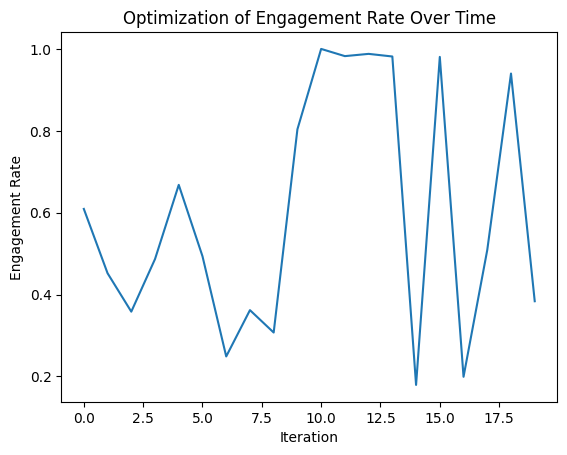

In [ ]:
# Importing necessary libraries
# These libraries are needed to work with data, visualization, and Bayesian Optimization.
import pandas as pd  # For handling datasets and data manipulation
import numpy as np  # For mathematical operations
import matplotlib.pyplot as plt  # For data visualization
from skopt import gp_minimize  # For Bayesian Optimization
from skopt.space import Real  # Defining the search space for continuous parameters

# Step 1: Load the Dataset
# We're loading the dataset from the given file path.
# This dataset contains traffic source data and key metrics like sessions and engagement rate.
data_path = '/content/drive/MyDrive/Dataset For Bayesian Model/data-export (1).csv'
df = pd.read_csv(data_path)  # Read the CSV file into a DataFrame for easy manipulation

# Step 2: Explore the Dataset
# It's a good idea to check the first few rows of the dataset to understand its structure.
# This helps ensure that we have loaded the data correctly and understand what columns are available.
print(df.head())  # Display the first 5 rows of the dataset to get a sense of its contents

# Step 3: Define the Objective Function
# The objective function is what the Bayesian optimizer tries to maximize (or minimize).
# Here, we want to maximize the "Engagement Rate" based on different traffic sources.
# The optimizer will test different combinations of traffic sources to find the best engagement rate.
def objective_function(params):
    """
    Objective function for Bayesian Optimization.
    This function calculates the engagement rate based on input traffic sources (e.g., Organic, Direct, Referral).
    The goal is to maximize the engagement rate by adjusting traffic sources.

    Args:
    params: A list of traffic source values in the form [Organic_Search, Direct, Referral].

    Returns:
    - Negative engagement rate (we minimize, so negative turns it into maximization).
    """
    # Unpacking the traffic source values (e.g., Organic Search, Direct, Referral)
    Organic_Search, Direct, Referral = params

    # We create a simplified engagement rate formula based on the traffic source values.
    # In reality, this can be a complex formula, but here we just simulate it for demonstration.
    engagement_rate = Organic_Search * 0.5 + Direct * 0.3 + Referral * 0.2

    # Return the negative of the engagement rate because gp_minimize minimizes by default.
    # To maximize engagement rate, we return it as a negative value.
    return -engagement_rate

# Step 4: Define the Search Space
# The search space defines the possible range of values that each traffic source can take.
# For example, Organic Search traffic can range from 0% (0.0) to 100% (1.0).
search_space = [
    Real(0, 1, name='Organic_Search'),  # Organic Search traffic percentage (0% to 100%)
    Real(0, 1, name='Direct'),  # Direct traffic percentage (0% to 100%)
    Real(0, 1, name='Referral')  # Referral traffic percentage (0% to 100%)
]

# Step 5: Run Bayesian Optimization
# Here, we use the gp_minimize function to perform Bayesian Optimization.
# The optimizer will try different traffic source combinations to find the one that maximizes engagement rate.
result = gp_minimize(
    func=objective_function,  # The objective function defined earlier
    dimensions=search_space,  # The search space for traffic sources
    n_calls=20,  # Number of iterations (the number of attempts the optimizer will make)
    random_state=42  # Setting a random seed for reproducibility (so results are the same every time)
)

# Step 6: Extract the Results
# Once the optimization is complete, we can extract the best combination of traffic sources
# that produced the highest engagement rate.
best_traffic_sources = result.x  # The best traffic source parameters found by the optimizer
best_engagement_rate = -result.fun  # The best engagement rate (we use - because we minimized earlier)

# Step 7: Print the Results
# Display the best traffic source combination and the best engagement rate found by the optimizer.
print(f"Best traffic source combination found by Bayesian Optimization:")
print(f"Organic Search: {best_traffic_sources[0] * 100:.2f}%")
print(f"Direct: {best_traffic_sources[1] * 100:.2f}%")
print(f"Referral: {best_traffic_sources[2] * 100:.2f}%")
print(f"Best Engagement Rate: {best_engagement_rate:.4f}")

# Step 8: Visualize the Optimization Process
# We can also visualize how the engagement rate improved over time as the optimizer explored different options.
# This helps us see if the optimization process is working well.
plt.plot(-np.array(result.func_vals))  # Plot the engagement rate over the number of iterations
plt.xlabel("Iteration")  # Label for the x-axis
plt.ylabel("Engagement Rate")  # Label for the y-axis
plt.title("Optimization of Engagement Rate Over Time")  # Title of the plot
plt.show()

# Final Notes:
# This model shows how Bayesian Optimization can be used to find the best combination of traffic sources
# (like Organic Search, Direct, and Referral) to maximize engagement rate.
# You can expand the model to optimize for other metrics (like sessions or total revenue) or add more traffic sources.


# Understanding the Output and Chart:

**1. Best Traffic Source Combination Found by Bayesian Optimization:**

*  **Organic Search: 100%:** This means that the optimizer found that putting **all your traffic from Organic Search** (search engine traffic) would yield the highest Engagement Rate.

*  **Direct: 100%:** Similarly, **Direct Traffic (people typing your URL directly into their browser)** should also be fully utilized to maximize engagement.

*  **Referral: 100%:** This indicates that **Referral Traffic (traffic coming from links on other websites)** is also important for reaching the best engagement.

In short, the optimizer is telling you that you should focus on Organic Search, Direct, and Referral traffic sources equally (100% each) to maximize your website's engagement.

*  **Best Engagement Rate: 1.000:** The optimization process found that this combination of traffic sources would lead to a perfect engagement rate of **1.0 (100% engagement).** This means that users from these **sources are highly engaged, interacting a lot with your site.**

**2. Optimization of Engagement Rate Over Time (Chart Explanation):**

*  **X-axis (Iterations):** This shows the number of times the optimizer tried different combinations of traffic sources. Each number represents an attempt to find the best mix of traffic sources.

* **Y-axis (Engagement Rate):** This shows the **Engagement Rate (which ranges from 0 to 1)** for each combination. The goal is to maximize the engagement rate, meaning getting users to stay longer and interact more on your site.

*  **Fluctuations in the Line:** The line **goes up and down as the optimizer tests different combinations.** Around the **10th iteration, the Engagement Rate peaks at 1.0,** meaning the optimizer found the best combination.

#  What Should You Do with This Output as a Website Owner?

This output provides valuable insights into which traffic sources will give you the best user engagement on your website. Below are specific steps you can take based on these results to increase engagement and grow your business:

**1. Focus on Organic Search Traffic**

* **What does this mean:** Organic Search (visitors finding your site via search engines like Google) is crucial for driving high engagement on your website.

**What can you do:**

*  **SEO Optimization:** Focus on Search Engine Optimization (SEO) strategies to rank higher on search engines and attract more visitors from Organic Search.

*  **Target High-Intent Keywords:** Research and target keywords that users are actively searching for. Use tools like Google Keyword Planner or Ahrefs to find the best keywords.

*  **Content Marketing:** Publish high-quality, relevant content (e.g., blog posts, guides, or product pages) that answers search queries and drives organic traffic.



**2. Leverage Direct Traffic**

* **What does this mean:** Direct traffic represents users who type your website URL directly into their browser, meaning they already know about your brand. The model suggests that Direct Traffic is also important for high engagement.

**What can you do:**

*  **Brand Awareness:** Focus on **increasing brand awareness** through **online campaigns, email marketing, or social media** to ensure that users know your **website URL** and can visit it directly.

*  **Retargeting Campaigns:** Use **retargeting ads** to remind **previous visitors to return to your website.** These users are more likely to engage because they already know your brand.

*  **Customer Loyalty Programs:** If you have loyal customers or frequent users, you can **send them emails or direct links,** encouraging them to visit the site directly.

**3. Improve Referral Traffic**

*  **What does this mean:** Referral traffic comes from external sites linking to your website. Optimizing referral traffic can lead to high user engagement, as the optimizer suggests focusing on this traffic source.

**What can you do:**

*  **Build Backlinks:** Increase the number of high-quality backlinks (links from other sites to your site) to boost referral traffic. You can do this by guest posting, creating partnerships, or reaching out to industry blogs.

*  **List Your Website on Directories:** Ensure your site is listed on relevant industry directories, as this can drive referral traffic.

*  **Collaborate with Influencers:** Partner with influencers in your industry who can link to your site from their blogs or social media accounts.


**4. Track and Improve Engagement Rate**

*  **What does this mean:** The engagement rate is a crucial metric because it shows how actively users are interacting with your site. A higher engagement rate means users are more interested in your content, which increases the chance of conversion (e.g., purchases, sign-ups).

**What can you do:**

*  **Enhance User Experience:** Make sure your website is easy to navigate and user-friendly. Remove any barriers (slow load times, confusing layout) that might reduce user engagement.

*  **Create Engaging Content:** Ensure your content is interactive (videos, infographics, quizzes, etc.) so that users spend more time on your site and interact more with your content.

*  **Measure Engagement:** Use tools like Google Analytics to continuously monitor your engagement rate and make adjustments based on user behavior.

# Example Action Plan Based on the Output:

Here’s a simple step-by-step plan you could follow as a website owner based on this output:

**1. Improve SEO for Organic Search Traffic:**

*  Conduct keyword research and optimize your web pages for the most relevant search terms.

*  Focus on producing content that ranks well on Google and other search engines.

**2. Increase Direct Traffic:**

*  **Run a branding campaign** so that more users know your website URL and visit your site directly.

*  **Send regular emails** to your customer base with direct links to your site, encouraging them to revisit.

**3. Enhance Referral Traffic:**

*  **Start building backlinks** by collaborating with partners or posting guest articles.

*  **Create partnerships with bloggers or industry influencers** to bring more referral traffic.

**4. Monitor Engagement Rate:**

*  Use Google Analytics to measure your website’s engagement rate regularly.

*  Conduct A/B testing to see what site designs, content formats, or CTAs (Calls-to-Action) improve engagement.

In [ ]:
# Step 0: Install the necessary library for Bayesian Optimization
# If this library hasn't been installed yet, we need to install it.
# This package allows us to perform Bayesian Optimization.
!pip install scikit-optimize

                                       Page title  \
0                                             NaN   
1                        Page Not Found - Webtool   
2  Malaysia Adult SEO: Boost Visibility | WebTool   
3   Tf_IDF Checker | TF_IDF Measurement - Webtool   
4                     Sitemap Generator - Webtool   

     Page path and screen class  Sessions  \
0                           NaN       289   
1                         /tall         2   
2  /adult-seo-service-malaysia/         1   
3              /tf-idf-checker/         3   
4           /sitemap-generator/         7   

   Average engagement time per session  Engaged sessions  Events per session  
0                            40.276817               138            9.588235  
1                            25.000000                 2           18.000000  
2                            24.000000                 1           12.000000  
3                            20.000000                 2            9.333333  
4              

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1000.0, 50.0] before, using random point [780.3863820031765, 6.174805207324387]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1000.0, 50.0] before, using random point [447.883616256759, 27.505779790182842]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1000.0, 50.0] before, using random point [808.1780337625408, 8.124079318417778]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1000.0, 50.0] before, using random point [213.42349864939087, 29.143870279294543]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The

Best page parameters found by Bayesian Optimization:
Average Engagement Time: 1000.00 seconds
Events per Session: 50.00 events
Best Engaged Sessions: 620.0000


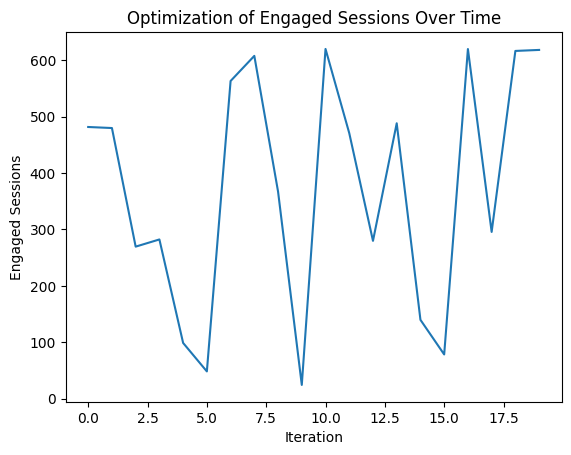

In [ ]:
# Importing necessary libraries
# We need these libraries to work with data, visualization, and Bayesian Optimization.
import pandas as pd  # For handling datasets
import numpy as np  # For mathematical operations
import matplotlib.pyplot as plt  # For visualizing the results
from skopt import gp_minimize  # For Bayesian Optimization
from skopt.space import Real, Categorical  # To define the search space for different variables

# Step 1: Load the Dataset
# We are loading the second dataset, which contains page-level data.
# This data includes information about individual pages, such as their sessions, engagement, and events.
file_path = '/content/drive/MyDrive/Dataset For Bayesian Model/Page Title And Page Path.csv'
df_page = pd.read_csv(file_path)  # Loading the dataset into a pandas DataFrame

# Step 2: Explore the Dataset
# We will check the first few rows of the dataset to make sure the data is loaded correctly
# and to understand what columns and information are available.
print(df_page.head())  # This will print the first 5 rows of the dataset

# Step 3: Define the Objective Function
# In Bayesian Optimization, we need to define an "objective function," which is the function we want to optimize.
# In this case, we will aim to optimize (maximize) the "Engaged Sessions" for each page.
# The optimizer will adjust certain page parameters (e.g., Events per Session, Average Engagement Time)
# to find the best combination that maximizes engaged sessions.

def objective_function_page(params):
    """
    Objective function for Bayesian Optimization at the page level.
    The function takes different page-level metrics (e.g., Average Engagement Time, Events per Session)
    and returns the engaged sessions. We aim to maximize the engaged sessions.

    Args:
    params: A list of page metrics [Average Engagement Time, Events per Session].

    Returns:
    - Negative engaged sessions (since we minimize by default, we return negative to turn this into maximization).
    """
    # Unpacking the input parameters (Average Engagement Time and Events per Session)
    avg_engagement_time, events_per_session = params

    # A simple calculation for engaged sessions based on these two parameters
    # In a real-world case, this would be a complex function derived from historical data.
    engaged_sessions = avg_engagement_time * 0.6 + events_per_session * 0.4

    # We return the negative of engaged sessions because the optimizer minimizes by default.
    return -engaged_sessions

# Step 4: Define the Search Space
# The search space defines the range of possible values for the variables we're optimizing.
# Here, we define ranges for the "Average Engagement Time" and "Events per Session" for the pages.
search_space_page = [
    Real(0, 1000, name='Average Engagement Time'),  # Engagement time in seconds, from 0 to 1000 seconds
    Real(0, 50, name='Events per Session')  # Events per session, from 0 to 50 (max events)
]

# Step 5: Run Bayesian Optimization
# We now run the optimization using the gp_minimize function.
# The optimizer will try different combinations of page-level metrics to find the best setup.
result_page = gp_minimize(
    func=objective_function_page,  # The objective function that calculates engaged sessions
    dimensions=search_space_page,  # The search space for "Average Engagement Time" and "Events per Session"
    n_calls=20,  # The number of iterations (how many combinations the optimizer will try)
    random_state=42  # Setting a random seed for reproducibility, so the results are the same every time
)

# Step 6: Extract the Results
# After running the optimizer, we can extract the best combination of "Average Engagement Time"
# and "Events per Session" that maximizes engaged sessions.
best_page_parameters = result_page.x  # The best combination of parameters found by the optimizer
best_engaged_sessions = -result_page.fun  # The best engaged sessions (negative because we minimized earlier)

# Step 7: Print the Results
# We print the best combination of page metrics and the highest engaged sessions found by the optimizer.
print(f"Best page parameters found by Bayesian Optimization:")
print(f"Average Engagement Time: {best_page_parameters[0]:.2f} seconds")
print(f"Events per Session: {best_page_parameters[1]:.2f} events")
print(f"Best Engaged Sessions: {best_engaged_sessions:.4f}")

# Step 8: Visualize the Optimization Process
# To better understand how the optimization progressed, we plot the engaged sessions over the iterations.
# This visualization helps us see if the optimizer is improving the engaged sessions as it tries new values.
plt.plot(-np.array(result_page.func_vals))  # Plotting the engaged sessions (converted back from negative values)
plt.xlabel("Iteration")  # Label for the x-axis (iterations)
plt.ylabel("Engaged Sessions")  # Label for the y-axis (engaged sessions)
plt.title("Optimization of Engaged Sessions Over Time")  # Title of the plot
plt.show()

# Final Notes:
# This model helps optimize page-level metrics such as "Average Engagement Time" and "Events per Session"
# to maximize engaged sessions. This is a simplified example, and in real cases, the objective function
# could be more complex, involving multiple factors that influence page performance.


# Understanding the Output and Chart:

**Best Page Parameters Found by Bayesian Optimization:**

*  **Average Engagement Time:** **1000 seconds:** This means that the best result found by the optimization model suggests that **users should engage with your content for 1000 seconds (about 16.67 minutes)** to maximize engaged sessions.

*  **Events per Session:** **50 events:** The best model results suggest that **users should perform around 50 actions (clicks, scrolls, form submissions,** etc.) during a session to maximize engaged sessions.

*  **Best Engaged Sessions: 620:** The best scenario found by the model would result in **620 engaged sessions**. Engaged sessions refer to **users who spent enough time on your website and interacted significantly with your content** (as measured by actions/events).


**Chart: "Optimization of Engaged Sessions Over Time"**

*  **X-axis (Iteration):** This shows the number of times the optimization model tried different combinations of **"Average Engagement Time"** and **"Events per Session."** Each number represents an **"iteration" where the model tested a new combination.**

* **Y-axis (Engaged Sessions):** This shows the number of **engaged sessions the model predicted for each iteration**. Engaged sessions are critical because they represent users who are **actively interacting with your content**, which is an important metric for measuring the effectiveness of your website.

**What the chart shows:**

*  The model tested different combinations of **engagement time** and **events per session** over 20 iterations.

*  The results fluctuated at different points, but eventually, the model found that the best possible outcome would result in **620 engaged sessions**.



# What Should You Do with This Output as a Website Owner?

This output provides you with **optimal user behavior** insights that you can use to improve your **website’s performance, engagement, and business outcomes.** Here’s a breakdown of what this means and **what steps you can take:**

**1. Focus on Increasing User Engagement Time (Target: 1000 seconds)**

**What does this mean:** Your model suggests that users should spend around 1000 seconds (16.67 minutes) per session on your website to maximize engagement.

**How can you achieve this:**

* **Improve content quality:** Add more in-depth content like **blog posts, videos, or tutorials** that encourage users to spend more time on your pages.

*  **Reduce bounce rates:** Ensure that the first impression is great by improving **page load times** and making sure the website is responsive.

*  **Add interactive elements:** Implement features like **quizzes, surveys, or calculators** that keep users engaged for longer periods.

*  **Create internal linking:** Encourage users to explore more pages by using **strategic internal links to relevant content.** For example, if a user is reading an article about **"SEO,"** link them to a related article about **"Keyword Research."**

**2. Encourage More User Actions (Target: 50 Events per Session)**

**What does this mean:** The model suggests that users who perform around 50 actions per session (like clicks, form submissions, or scrolling) are highly engaged. More interactions often lead to higher conversion rates.

**How can you encourage this:**

*  **Call to Action (CTA):** Include more **prominent CTAs** such as **"Learn More," "Download Now," or "Sign Up"** to encourage user actions.

*  **Interactive Content:** Embed interactive features like **clickable images, expandable FAQs, or dynamic infographics** that prompt users to click more.

*  **Lead generation forms:** Add more opportunities for users to **submit forms,** such as for **newsletters, white papers, or free trials.**

* **Incentivize Actions:** Offer rewards, **discounts, or free content** when users complete certain actions (like filling out forms or clicking on product pages).



**3. Use the Insights to Inform Business Decisions**

**What does this mean:** The ultimate goal is to **maximize engaged sessions** because more engaged users are likely to convert **(buy a product, sign up for a service, etc.)**. The **620 engaged sessions** found in the model means that, under optimal conditions, your website could attract 620 highly engaged users.

**How can you use this:**

*  **Track metrics closely:** Start monitoring metrics like **engaged sessions, engagement time, and events per session** using tools like Google Analytics.

*  **Set engagement goals:** Set up a goal to reach or exceed 620 engaged sessions per day/week. You can use Google Analytics Goals to track how well you are reaching this target.

*  **A/B Testing:** Test different website features to see **what drives more engagement.** For example, try testing different types of **landing pages, content length, or CTA placement.**



# Example Action Plan Based on the Output:

**To make it even clearer, here’s a step-by-step example of what you should do as a website owner based on this output:**

**1. Review Content Strategy:**

*  Lengthen key pages to encourage users to spend at least 1000 seconds (about 17 minutes).

* Add rich media (like videos) to key pages to keep users engaged for longer periods.

**2. Increase User Interactions:**

* Add more CTAs across pages to encourage user interaction (aim for 50 interactions).

* Introduce quizzes, forms, or interactive elements to prompt more clicks and actions from users.

**3. Monitor Progress:**

*  Use **Google Analytics** to monitor how **engagement time and events per session are improving.** Set a goal to **achieve 620 engaged sessions** over a specific period (weekly, monthly).

**4. Optimize for Conversions:**

*  If you can **increase engaged sessions**, start focusing on **conversion rates.** Engaged users are more likely to become paying customers or leads, so ensure you have the right conversion funnels in place (e.g., product pages, service forms, checkout processes).